In [16]:
import numpy as np
from sko.GA import GA
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
def g1(x):
    t1 = 5*(x[0]+x[1]+x[2]+x[3])
    t2 = 5*(x[0]**2 + x[1]**2 + x[2]**2 + x[3]**2)
    t3 = (x[4]+x[5]+x[6]+x[7]+x[8]+x[9]+x[10]+x[11]+x[12])
    f = t1-t2-t3
    return f


In [18]:
ueq = [
    lambda x: 2*x[0] + 2*x[1]+x[9]+x[10] -10,
    lambda x: 2*x[0] + 2*x[2]+x[9]+x[11] -10,
    lambda x: 2*x[1] + 2*x[2]+x[10]+x[11] -10,
    lambda x: -8*x[0] +x[9],
    lambda x: -8*x[1] +x[10],
    lambda x: -8*x[2] +x[11],
    lambda x: -2*x[3] - x[4] +x[9],
    lambda x: -2*x[5] - x[6] +x[10],
    lambda x: -2*x[7] - x[8] +x[11]
]


In [19]:
ga = GA(func=g1, n_dim=13, size_pop=100, max_iter=1000, prob_mut=0.0003, lb=[0] * 13, ub=[1,1,1,1,1,1,1,1,1,100,100,100,1], constraint_ueq = ueq, precision=1e-7)
best_x, best_y = ga.run()
print('best_x:', best_x, '\n', 'best_y:', best_y)


best_x: [0.99999923 0.99999911 1.         1.         0.99999607 1.
 0.99999809 1.         0.99999982 2.99995458 2.98461905 2.99999845
 0.99999994] 
 best_y: [-14.98455765]


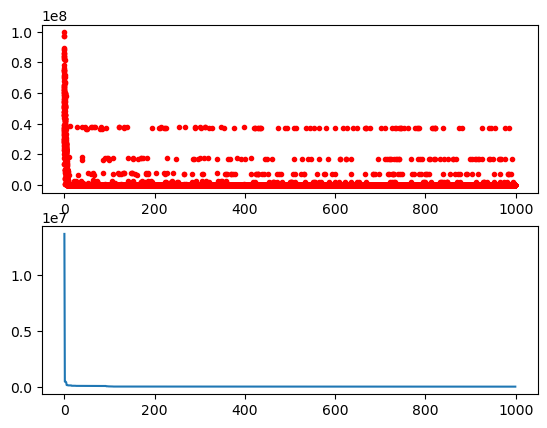

In [20]:
Y_history = pd.DataFrame(ga.all_history_Y)
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()
